# Bước 3: Tiền xử lý dữ liệu.

## Cần xử lý dữ liệu để mô hình có thể học được (hoặc học có hiệu quả hơn)
### - Xử lý các giá trị bị thiếu
### - Mã hoá các dữ liệu danh mục
### - Tách dữ liệu thành training set và test set
### - Feature Scaling (tiêu chuẩn hoá/tính năng) (tránh giá trị của 1 cột quá lệch với cột khác, vd: mức lương với tuổi)

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tương tự như step 1
train_df = pd.read_csv("train.csv", index_col="PassengerId")

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]


def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")


convert_cat(train_df, features)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    category
 1   Name      891 non-null    object  
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Ticket    891 non-null    object  
 7   Fare      891 non-null    float64 
 8   Cabin     204 non-null    object  
 9   Embarked  889 non-null    category
 10  Survived  891 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Missing data replacement

- Kiểm tra độ mất mát của dữ liệu

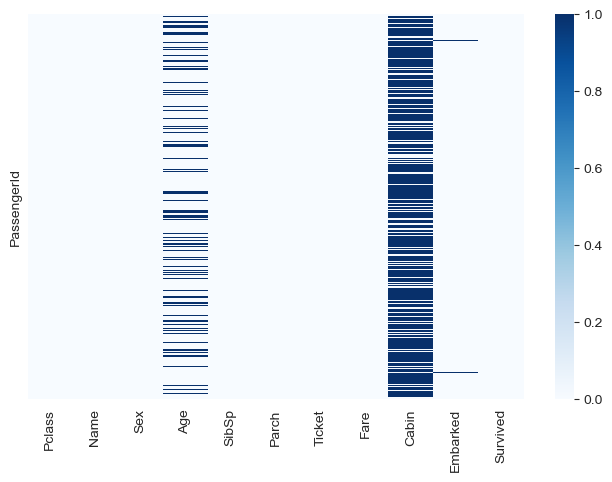

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(train_df.isna(), cmap="Blues", yticklabels=False);

#### Ta thấy Age, Cabin, Embarked có sự mất mát dữ liệu

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
# thay thế bằng giá trị mean
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [34]:
X = train_df.iloc[:, :-1].values
X
# lấy dữ liệu cột Age

array([[3, 'Braund, Mr. Owen Harris', 'male', ..., 7.25, nan, 'S'],
       [1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'female', ..., 71.2833, 'C85', 'C'],
       [3, 'Heikkinen, Miss. Laina', 'female', ..., 7.925, nan, 'S'],
       ...,
       [3, 'Johnston, Miss. Catherine Helen "Carrie"', 'female', ...,
        23.45, nan, 'S'],
       [1, 'Behr, Mr. Karl Howell', 'male', ..., 30.0, 'C148', 'C'],
       [3, 'Dooley, Mr. Patrick', 'male', ..., 7.75, nan, 'Q']],
      dtype=object)

In [35]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 3:4])
X[:, 3:4] = imputer.transform(X[:, 3:4])

In [36]:
X

array([[3, 'Braund, Mr. Owen Harris', 'male', ..., 7.25, nan, 'S'],
       [1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'female', ..., 71.2833, 'C85', 'C'],
       [3, 'Heikkinen, Miss. Laina', 'female', ..., 7.925, nan, 'S'],
       ...,
       [3, 'Johnston, Miss. Catherine Helen "Carrie"', 'female', ...,
        23.45, nan, 'S'],
       [1, 'Behr, Mr. Karl Howell', 'male', ..., 30.0, 'C148', 'C'],
       [3, 'Dooley, Mr. Patrick', 'male', ..., 7.75, nan, 'Q']],
      dtype=object)

### Encode Categorical data
- Bởi vì máy không thể đọc được dữ lệu categorical, vì vậy, chúng ta caanf chuyển sang dạng số để đưa vào máy

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder="passthrough")
X = ct.fit_transform(X)
X

array([[0.0, 1.0, 3, ..., 7.25, nan, 'S'],
       [1.0, 0.0, 1, ..., 71.2833, 'C85', 'C'],
       [1.0, 0.0, 3, ..., 7.925, nan, 'S'],
       ...,
       [1.0, 0.0, 3, ..., 23.45, nan, 'S'],
       [0.0, 1.0, 1, ..., 30.0, 'C148', 'C'],
       [0.0, 1.0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [38]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [10])], remainder="passthrough")
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 1.0, ..., 'A/5 21171', 7.25, nan],
       [1.0, 0.0, 0.0, ..., 'PC 17599', 71.2833, 'C85'],
       [0.0, 0.0, 1.0, ..., 'STON/O2. 3101282', 7.925, nan],
       ...,
       [0.0, 0.0, 1.0, ..., 'W./C. 6607', 23.45, nan],
       [1.0, 0.0, 0.0, ..., '111369', 30.0, 'C148'],
       [0.0, 1.0, 0.0, ..., '370376', 7.75, nan]], dtype=object)